Ã®ncarcarea È™i descrierea bazei de date

In [2]:
import pandas as pd  # Pandas pentru manipularea datelor

df = pd.read_csv("Combined Data.csv")

In [3]:
#afiseaza primele 5 randuri
print(df.head())

   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [4]:
# vercÄƒm informaÈ›i despre date
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


VerificÄƒm dacÄƒ avem valori lipsÄƒ

In [5]:
print(df.isnull().sum())

Unnamed: 0      0
statement     362
status          0
dtype: int64


CurÄƒÈ›area datelor
-eliminam colana cu index, poate fii redurdantÄƒ
-eliminÄƒm valorile lipsÄƒ din statement

In [6]:
# EliminÄƒm coloana Unnamed: 0
df = df.drop(columns=["Unnamed: 0"])

# EliminÄƒm rÃ¢ndurile unde statement este NaN
df = df.dropna(subset=["statement"])

# VerificÄƒm din nou datele dupÄƒ curÄƒÈ›are
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     52681 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None
statement    0
status       0
dtype: int64


Descrierea datelor 
-analizam distribuÈ›ia eticheteleor È™i lungimea textelor

In [7]:
print(df["status"].value_counts())  # NumÄƒrul de apariÈ›ii pentru fiecare etichetÄƒ

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


In [8]:
df["text_length"] = df["statement"].apply(len)  # AdÄƒugÄƒm o coloanÄƒ cu lungimea textelor
print(df["text_length"].describe())  # AfiÈ™eazÄƒ statistici (min, max, medie, etc.)

count    52681.000000
mean       578.713749
std        846.268855
min          2.000000
25%         80.000000
50%        317.000000
75%        752.000000
max      32759.000000
Name: text_length, dtype: float64


In [9]:
df.head(10)  # AfiÈ™eazÄƒ primele 10 rÃ¢nduri pentru a verifica modificÄƒrile

statement   status  text_length
0                                         oh my gosh  Anxiety           10
1  trouble sleeping, confused mind, restless hear...  Anxiety           64
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety           78
3  I've shifted my focus to something else but I'...  Anxiety           61
4  I'm restless and restless, it's been a month n...  Anxiety           72
5  every break, you must be nervous, like somethi...  Anxiety           76
6  I feel scared, anxious, what can I do? And may...  Anxiety           78
7    Have you ever felt nervous but didn't know why?  Anxiety           47
8  I haven't slept well for 2 days, it's like I'm...  Anxiety           70
9                 I'm really worried, I want to cry.  Anxiety           34

CorelaÈ›ia se aplicÄƒ pe date numerice aÈ™a cÄƒ transformÄƒm textul in informaÈ›ie numericÄƒ

In [10]:
df["word_count"] = df["statement"].apply(lambda x: len(str(x).split()))

In [11]:
df.head(10)  # AfiÈ™eazÄƒ primele 10 rÃ¢nduri pentru a verifica modificÄƒrile

statement   status  text_length  \
0                                         oh my gosh  Anxiety           10   
1  trouble sleeping, confused mind, restless hear...  Anxiety           64   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety           78   
3  I've shifted my focus to something else but I'...  Anxiety           61   
4  I'm restless and restless, it's been a month n...  Anxiety           72   
5  every break, you must be nervous, like somethi...  Anxiety           76   
6  I feel scared, anxious, what can I do? And may...  Anxiety           78   
7    Have you ever felt nervous but didn't know why?  Anxiety           47   
8  I haven't slept well for 2 days, it's like I'm...  Anxiety           70   
9                 I'm really worried, I want to cry.  Anxiety           34   

   word_count  
0           3  
1          10  
2          14  
3          11  
4          14  
5          14  
6          17  
7           9  
8          14  
9           7

Convertim etichetele (status) Ã®n numere

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["status_encoded"] = encoder.fit_transform(df["status"])

In [13]:
df.head(800)  

statement   status  text_length  \
0                                           oh my gosh  Anxiety           10   
1    trouble sleeping, confused mind, restless hear...  Anxiety           64   
2    All wrong, back off dear, forward doubt. Stay ...  Anxiety           78   
3    I've shifted my focus to something else but I'...  Anxiety           61   
4    I'm restless and restless, it's been a month n...  Anxiety           72   
..                                                 ...      ...          ...   
798  wow shey. I just realized and just found out t...   Normal           75   
799                   Galaxy opal giannis makes me cum   Normal           32   
800                     the harmonization HSUHSI Ã¢ Â¤Ã¯Â¸   Normal           30   
801     This morning feels like the wind is really Eid   Normal           46   
802  here who likes to make fmv, what apps do you u...   Normal          115   

     word_count  status_encoded  
0             3               0  
1            10               0  
2            14               0  
3            11               0  
4            14               0  
..          ...             ...  
798          17               3  
799           6               3  
800           5               3  
801           9               3  
802          26               3  

[800 rows x 5 columns]

CalculÄƒm matricea de corelaÈ›ie

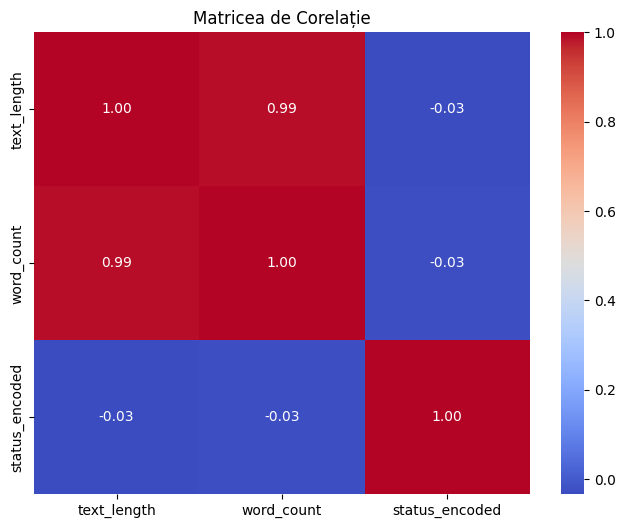

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# SelectÄƒm doar coloanele numerice
numeric_df = df[["text_length", "word_count", "status_encoded"]]

# CalculÄƒm matricea de corelaÈ›ie
correlation_matrix = numeric_df.corr()

# Vizualizare
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matricea de CorelaÈ›ie")
plt.show()
# VerificÄƒm corelaÈ›ia dintre lungimea textului È™i status

In [15]:
#stergem coloana text_length pentru ca sunt aproape indenice si sa nu fie redurdanta
df = df.drop(columns=["text_length"])

Calcularea entropiei

In [16]:
import numpy as np

# CalculÄƒm frecvenÈ›a fiecÄƒrei clase
status_counts = df['status'].value_counts(normalize=True)  # ProbabilitÄƒÈ›i

# AplicÄƒm formula entropiei
entropy = -np.sum(status_counts * np.log2(status_counts))

print(f"Entropia datasetului: {entropy:.4f}")


Entropia datasetului: 2.3364


Vom pregÄƒti textul de Ã®mpÄƒrÈ›ire pe cuvinte aÈ™adar avem nevoie sÄƒ il curÄƒÈ›Äƒm

CurÄƒÈ›area:

Transformare Ã®n litere mici
Eliminare punctuaÈ›ie, emoji-uri, caractere speciale
Eliminare stopwords (ex: the, is, at, on...)

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords

# DescÄƒrcÄƒm stopwords dacÄƒ nu sunt deja descÄƒrcate
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # VerificÄƒm dacÄƒ textul nu e NaN
        text = text.lower()  # TransformÄƒm Ã®n litere mici
        text = re.sub(r'\d+', '', text)  # EliminÄƒm cifrele
        text = text.translate(str.maketrans('', '', string.punctuation))  # EliminÄƒm punctuaÈ›ia
        text = ' '.join(word for word in text.split() if word not in stop_words)  # EliminÄƒm stopwords
        return text
    return ""

# AplicÄƒm curÄƒÈ›area pe Ã®ntreaga coloanÄƒ 'statement'
df['clean_statement'] = df['statement'].apply(clean_text)

# VerificÄƒm rezultatul
print(df[['statement', 'clean_statement']].head(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aspire3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   
5  every break, you must be nervous, like somethi...   
6  I feel scared, anxious, what can I do? And may...   
7    Have you ever felt nervous but didn't know why?   
8  I haven't slept well for 2 days, it's like I'm...   
9                 I'm really worried, I want to cry.   

                                     clean_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  
5  every break must nervous like something wrong ... 

Acum facem tokenizare(Ã®npÄƒrÈ›irea textului Ã®n cuvinte) È™i word cont

Am adaugat Ã®ncÄƒ o coloana Ã®n care am cuvintele in liste din fiecare descriere

In [18]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize



# FuncÈ›ie pentru tokenizare
df['tokens'] = df['clean_statement'].apply(word_tokenize)

# AdÄƒugÄƒm o coloanÄƒ cu numÄƒrul de cuvinte
df['word_count'] = df['tokens'].apply(len)

# VerificÄƒm rezultatul
print(df[['clean_statement', 'tokens', 'word_count']].head(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aspire3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aspire3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                     clean_statement  \
0                                            oh gosh   
1  trouble sleeping confused mind restless heart ...   
2  wrong back dear forward doubt stay restless re...   
3  ive shifted focus something else im still worried   
4                im restless restless month boy mean   
5  every break must nervous like something wrong ...   
6        feel scared anxious may family us protected   
7                       ever felt nervous didnt know   
8        havent slept well days like im restless huh   
9                         im really worried want cry   

                                              tokens  word_count  
0                                         [oh, gosh]           2  
1  [trouble, sleeping, confused, mind, restless, ...           7  
2  [wrong, back, dear, forward, doubt, stay, rest...           9  
3  [ive, shifted, focus, something, else, im, sti...           8  
4         [im, restless, restless, month, boy, m

Facem un shuffle la date pentru a amesteca rÃ¢ndurile

In [19]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=42)  # Random_state asigurÄƒ reproducibilitate
df.reset_index(drop=True, inplace=True)  # ResetÄƒm indexul dupÄƒ shuffle
print(df.head(10))  # VerificÄƒm primele 10 rÃ¢nduri dupÄƒ amestecare

                                           statement      status  word_count  \
0               I'm lazy to complain about it ba ihh      Normal           5   
1  i think the wifi on my iphone is broken it wil...      Normal          11   
2  Good tracking apps? I've been trying to find a...     Bipolar          40   
3  I have recently looked into reddit and found t...  Depression         293   
4                  that's your favorite thing to do?      Normal           3   
5  I have enough goodies to play santa claus but ...    Suicidal          24   
6  want to sleep but soon the call to prayer for ...      Normal           8   
7  you use them to wipe the handle of the shoppin...      Normal           5   
8  Is it good to only focus on 1 goal? What I mea...      Stress         219   
9  Hi guys, I am looking for podcasts to listen t...  Depression          58   

   status_encoded                                    clean_statement  \
0               3                            im

CalculÄƒm Gini Index care este utilizat pentru a mÄƒsura impuritatea unui set de date.

In [20]:
import numpy as np

# CalculÄƒm proporÈ›ia fiecÄƒrei clase
status_counts = df['status'].value_counts(normalize=True)

# AplicÄƒm formula Gini Index
gini_index = 1 - np.sum(status_counts ** 2)

print(f"Gini Index: {gini_index:.4f}")


Gini Index: 0.7665


Information Quantity (IQ) este similarÄƒ cu entropia

In [21]:
# CalculÄƒm Information Quantity (aceeaÈ™i formulÄƒ ca entropia)
information_quantity = -np.sum(status_counts * np.log2(status_counts))

print(f"Information Quantity: {information_quantity:.4f}")


Information Quantity: 2.3364


Facem un grafic pentru a observa comparaÈ›ile dintre Entropie, Gini Index È™i Information Quantity.

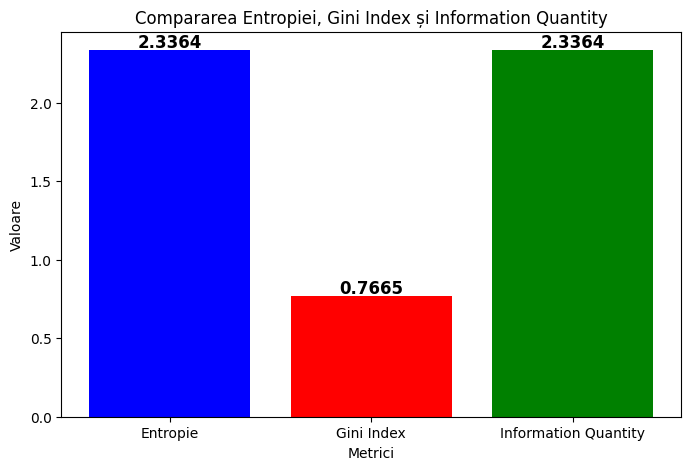

In [22]:
import matplotlib.pyplot as plt

# Valori pentru vizualizare
metrics = ['Entropie', 'Gini Index', 'Information Quantity']
values = [entropy, gini_index, information_quantity]

# CreÄƒm un bar chart
plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=['blue', 'red', 'green'])

# AdÄƒugÄƒm etichete È™i titlu
plt.xlabel("Metrici")
plt.ylabel("Valoare")
plt.title("Compararea Entropiei, Gini Index È™i Information Quantity")

# AfiÈ™Äƒm valorile pe bare
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12, fontweight='bold')

# AfiÈ™Äƒm graficul
plt.show()


In [23]:
df.head(5)
#salvam datele curatate
df.to_csv("Cleaned_Data.csv", index=False)

ÃŽnpÄƒrÈ›im datele 80% antrenare, 20% testare

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['clean_statement'], df['status'], test_size=0.2, random_state=42)
print(f"Dimensiunea setului de antrenament: {len(X_train)}")
print(f"Dimensiunea setului de testare: {len(X_test)}")

Dimensiunea setului de antrenament: 42144
Dimensiunea setului de testare: 10537


Cod pentru transformarea textului cu TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# IniÈ›ializÄƒm TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # LimitÄƒm la 5000 de caracteristici pentru performanÈ›Äƒ

# AplicÄƒm pe datele de antrenament È™i test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Forma matricei TF-IDF pentru train:", X_train_tfidf.shape)
print("Forma matricei TF-IDF pentru test:", X_test_tfidf.shape)


Forma matricei TF-IDF pentru train: (42144, 5000)
Forma matricei TF-IDF pentru test: (10537, 5000)


ÃŽncercÄƒm datele noastre pe 3 algoritmi sÄƒ vedem care este mai bun 
Vom implementa antrenarea È™i evaluarea celor 3 modele folosind Naive Bayes, Logistic Regression È™i Random Forest.


ðŸ”¹ Naive Bayes Model Evaluation ðŸ”¹
Accuracy: 0.6839
Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.77      0.65      0.70       765
             Bipolar       0.89      0.52      0.65       595
          Depression       0.54      0.80      0.65      3083
              Normal       0.83      0.82      0.82      3278
Personality disorder       0.96      0.11      0.20       207
              Stress       0.86      0.14      0.24       527
            Suicidal       0.71      0.56      0.62      2082

            accuracy                           0.68     10537
           macro avg       0.79      0.51      0.55     10537
        weighted avg       0.72      0.68      0.67     10537



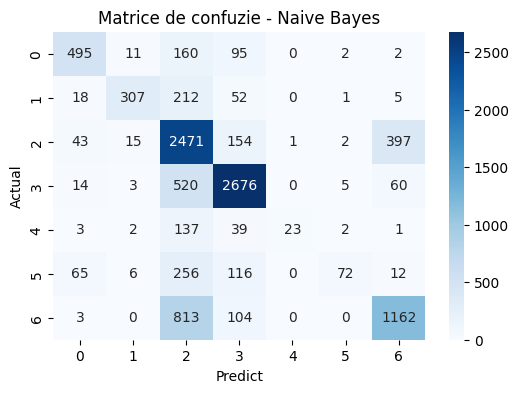


ðŸ”¹ Logistic Regression Model Evaluation ðŸ”¹
Accuracy: 0.7684
Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.79      0.78      0.78       765
             Bipolar       0.88      0.73      0.80       595
          Depression       0.72      0.73      0.73      3083
              Normal       0.83      0.95      0.89      3278
Personality disorder       0.83      0.48      0.61       207
              Stress       0.67      0.44      0.53       527
            Suicidal       0.69      0.66      0.67      2082

            accuracy                           0.77     10537
           macro avg       0.77      0.68      0.72     10537
        weighted avg       0.76      0.77      0.76     10537



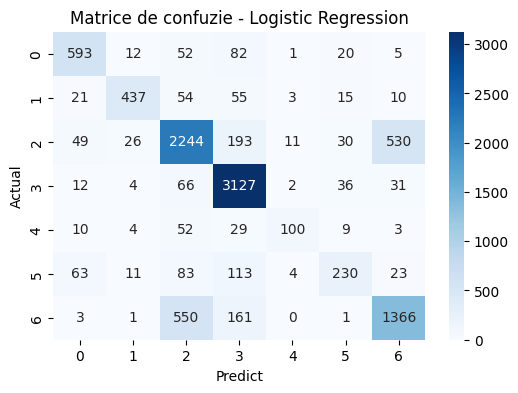


ðŸ”¹ Random Forest Model Evaluation ðŸ”¹
Accuracy: 0.7233
Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.80      0.68      0.74       765
             Bipolar       0.96      0.54      0.69       595
          Depression       0.60      0.79      0.68      3083
              Normal       0.82      0.94      0.88      3278
Personality disorder       1.00      0.43      0.60       207
              Stress       0.92      0.26      0.41       527
            Suicidal       0.69      0.49      0.57      2082

            accuracy                           0.72     10537
           macro avg       0.83      0.59      0.65     10537
        weighted avg       0.74      0.72      0.71     10537



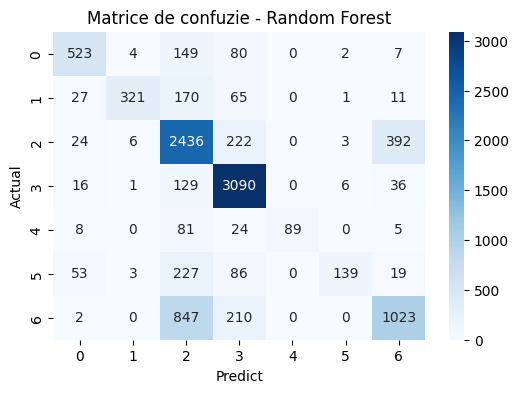

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. IniÈ›ializÄƒm modelele
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. AntrenÄƒm modelele
nb_model.fit(X_train_tfidf, y_train)
lr_model.fit(X_train_tfidf, y_train)
rf_model.fit(X_train_tfidf, y_train)

# 3. Facem predicÈ›ii
nb_pred = nb_model.predict(X_test_tfidf)
lr_pred = lr_model.predict(X_test_tfidf)
rf_pred = rf_model.predict(X_test_tfidf)

# 4. EvaluÄƒm modelele
def evaluate_model(name, y_test, y_pred):
    print(f"\nðŸ”¹ {name} Model Evaluation ðŸ”¹")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Matrice de confuzie
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrice de confuzie - {name}")
    plt.xlabel("Predict")
    plt.ylabel("Actual")
    plt.show()

evaluate_model("Naive Bayes", y_test, nb_pred)
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)


Cel mai bun model pana acum este Logistic Regression 

Doresc sÄƒ obÈ›in rezultate mai bune aÈ™a cÄƒ voi incerca sÄƒ mai Ã®nbunÄƒtÄƒÈ›esc datele

Aplic N-grams la date

TF-IDF Ã®È›i analizeazÄƒ fiecare cuvÃ¢nt separat, dar Ã®n unele cazuri contextul conteazÄƒ mai mult.
De exemplu:
ðŸ”¹ "I feel very sad" â†’ Cu TF-IDF, fiecare cuvÃ¢nt e analizat separat: "I", "feel", "very", "sad"
ðŸ”¹ Cu bigrame (n-gram=2): "I feel", "feel very", "very sad"
ðŸ”¹ Cu trigrame (n-gram=3): "I feel very", "feel very sad"

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)  # Unigram + Bigram
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [28]:
print("Noua formÄƒ matrice TF-IDF pentru train:", X_train_tfidf.shape)
print("Noua formÄƒ matrice TF-IDF pentru test:", X_test_tfidf.shape)


Noua formÄƒ matrice TF-IDF pentru train: (42144, 5000)
Noua formÄƒ matrice TF-IDF pentru test: (10537, 5000)


In [29]:
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Primele 20 de features:", feature_names[:20])


Primele 20 de features: ['abandoned' 'abdomen' 'abilify' 'ability' 'able' 'able find' 'able get'
 'able go' 'able help' 'able make' 'abroad' 'absolute' 'absolutely'
 'absolutely nothing' 'abt' 'abuse' 'abused' 'abusing' 'abusive'
 'academic']


In [30]:
bigrams = [word for word in feature_names if " " in word]
print(f"NumÄƒr de bigrame: {len(bigrams)} din {len(feature_names)}")
print("Primele 10 bigrame:", bigrams[:10])


NumÄƒr de bigrame: 1770 din 5000
Primele 10 bigrame: ['able find', 'able get', 'able go', 'able help', 'able make', 'absolutely nothing', 'act like', 'acting like', 'actually want', 'advice would']


Word Embeddings

TF-IDF nu capteazÄƒ relaÈ›ia dintre cuvinte, dar modelele de embeddings Ã®nvaÈ›Äƒ reprezentÄƒri numerice mai eficiente.

Vom folosi Bert

Lemmatizare in loc de Stemming

In [35]:
from nltk.stem import WordNetLemmatizer
import nltk

# Download the wordnet resource
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['clean_statement'] = df['clean_statement'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df['clean_statement'].head(10)  # VerificÄƒm primele 10 rÃ¢nduri dupÄƒ lemmatizare

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aspire3\AppData\Roaming\nltk_data...


0                              im lazy complain ba ihh
1    think wifi iphone broken quot connect quot act...
2    good tracking apps ive trying find apps track ...
3    recently looked reddit found place actually qu...
4                                 thats favorite thing
5    enough goody play santa claus reindeer came wa...
6      want sleep soon call prayer midday heavy sleepy
7                        use wipe handle shopping cart
8    good focus goal mean example goal find good jo...
9    hi guy looking podcasts listen tall depression...
Name: clean_statement, dtype: object

 Optimizarea hiperparametrilor

GridSearchCV (cÄƒutare exhaustivÄƒ) dureaza prea mult

Incercam RandomizedSearchCV (cÄƒutare aleatorie)

Aici am incercat pentru Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_tfidf, y_train)  # Use TF-IDF-transformed data

print(random_search.best_params_)




{'n_estimators': 50, 'min_samples_split': 10, 'max_depth': 30}


In [43]:
print(random_search.best_score_)

0.6661446658802135


Pentru Logistic Regresion

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],  # L1 funcÈ›ioneazÄƒ doar cu anumite solvers
    'solver': ['lbfgs', 'liblinear']
}

log_search = GridSearchCV(LogisticRegression(max_iter=1000), log_param_grid, cv=5, scoring='accuracy')
log_search.fit(X_train_tfidf, y_train)

print("Best Logistic Regression params:", log_search.best_params_)
print("Best Logistic Regression score:", log_search.best_score_)


Best Logistic Regression params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression score: 0.7593252451885576


Pentru Navie Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB

nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

nb_search = GridSearchCV(MultinomialNB(), nb_param_grid, cv=5, scoring='accuracy')
nb_search.fit(X_train_tfidf, y_train)

print("Best Naive Bayes params:", nb_search.best_params_)
print("Best Naive Bayes score:", nb_search.best_score_)

Best Naive Bayes params: {'alpha': 0.1}
Best Naive Bayes score: 0.6997438555829951


Evaluam din nou modelele 

In [46]:
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
best_lr = LogisticRegression(C=1, penalty='l2', solver='lbfgs', max_iter=1000)
best_lr.fit(X_train_tfidf, y_train)
y_pred_lr = best_lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
best_rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, max_depth=30)
best_rf.fit(X_train_tfidf, y_train)
y_pred_rf = best_rf.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Naive Bayes
best_nb = MultinomialNB(alpha=0.1)
best_nb.fit(X_train_tfidf, y_train)
y_pred_nb = best_nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Logistic Regression Accuracy: 0.7659675429439119
                      precision    recall  f1-score   support

             Anxiety       0.80      0.78      0.79       765
             Bipolar       0.87      0.73      0.79       595
          Depression       0.72      0.73      0.72      3083
              Normal       0.83      0.95      0.89      3278
Personality disorder       0.84      0.49      0.62       207
              Stress       0.65      0.42      0.51       527
            Suicidal       0.68      0.65      0.67      2082

            accuracy                           0.77     10537
           macro avg       0.77      0.68      0.71     10537
        weighted avg       0.76      0.77      0.76     10537

Random Forest Accuracy: 0.665749264496536
                      precision    recall  f1-score   support

             Anxiety       0.83      0.44      0.57       765
             Bipolar       0.95      0.43      0.60       595
          Depression       0.57      

ÃŽn final cel mai bun model este Logistic Regression

In [47]:
import joblib
joblib.dump(best_lr, 'final_logistic_model.pkl')


['final_logistic_model.pkl']